<h2 style='text-align:center;font-size:40px;background-color:#3440eb;border:20px;color:white'>Adult Census Income Prediction<h2>

### Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the > 50K group or <= 50K group.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install imbalanced-learn --upgrade


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
column_names = df.columns
print(column_names)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Exploratory Data Analysis <h2>

## 1. Based on Sex/Gender

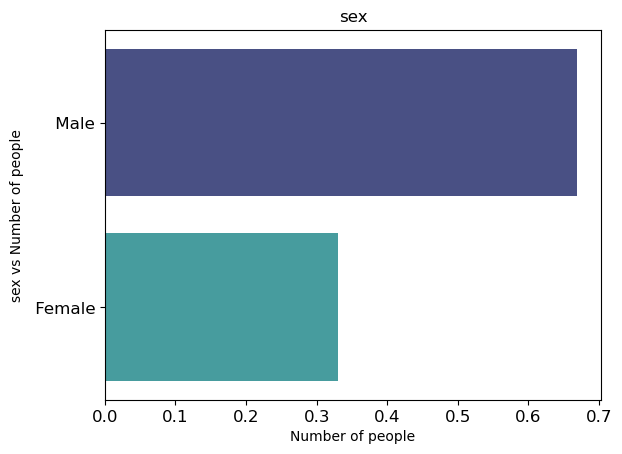

In [6]:
edu = df["sex"].value_counts(normalize=True)

sns.barplot(x = edu.values, y = edu.index, palette='mako')
plt.title('sex')
plt.xlabel('Number of people')
plt.ylabel('sex vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

### From the above plot Majority of them are Male

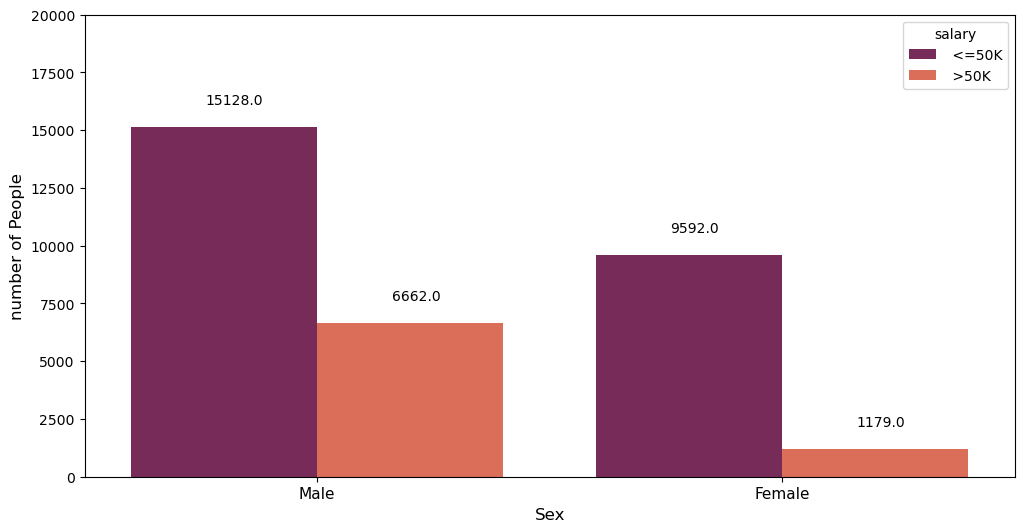

In [7]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df, x = 'sex', hue="salary", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("number of People", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


### As majority of them are male in the dataset. So, more number of men is getting salary is <= 50k and > 50k

## 2. Based on Education

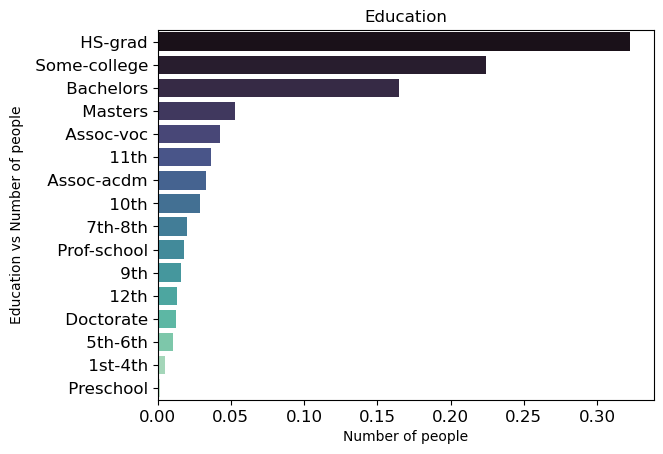

In [8]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(x = edu.values, y = edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

### From the above plot, we see that the majority of people have completed HS-Grad, Some-College, Bachelors greater than 15 %

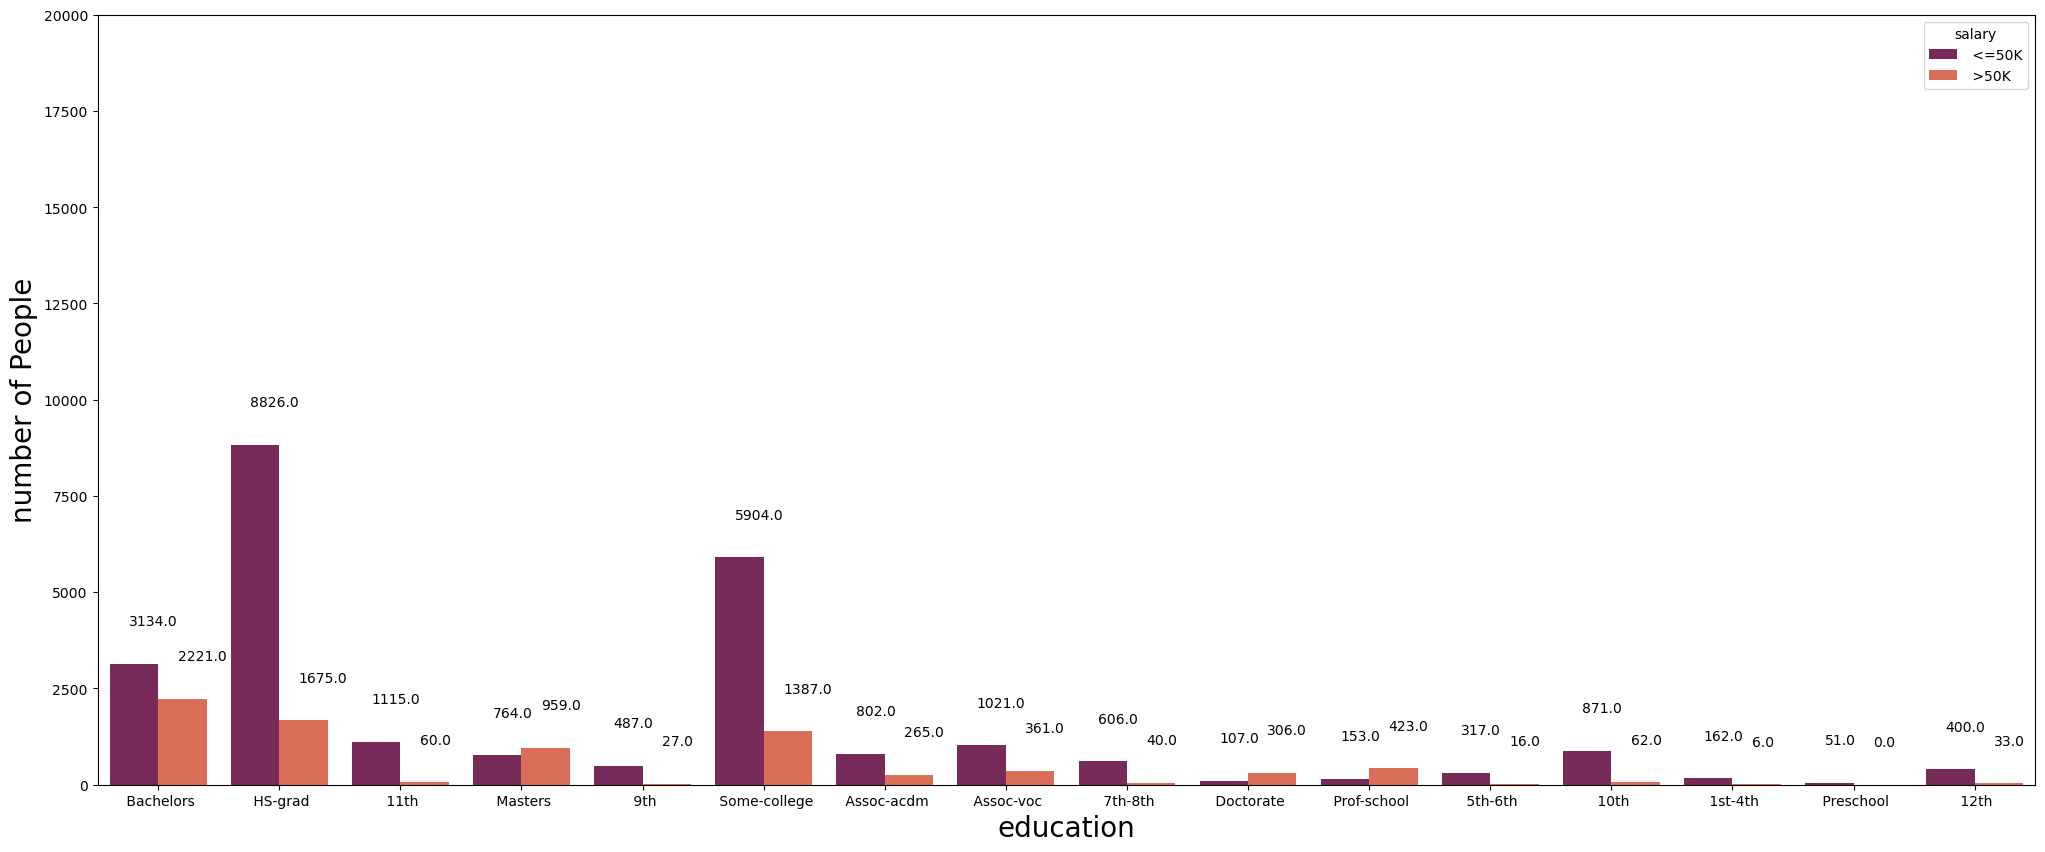

In [9]:
plt.figure(figsize=(25,10))
ax = sns.countplot(data = df, x = 'education', hue="salary", palette = 'rocket')

plt.xlabel("education", fontsize= 20)
plt.ylabel("number of People", fontsize= 20)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


### From the above plot HS-grad, Bachelors, Some-college are the more number of people is getting salary is <= 50k and > 50k

# 3.Based on Marital Status

In [10]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

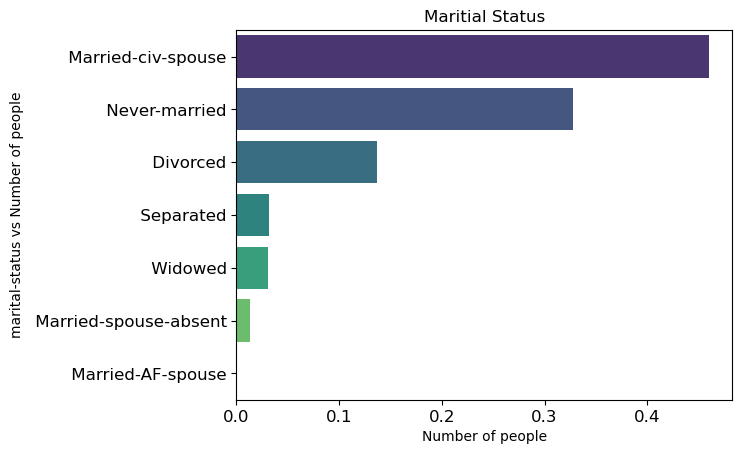

In [11]:
status = df["marital-status"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('Maritial Status')
plt.xlabel('Number of people')
plt.ylabel('marital-status vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### From the above plot, we see that the majority of people having Marital Status of             Married-civ-spouse, Never-married are greater than 30%.

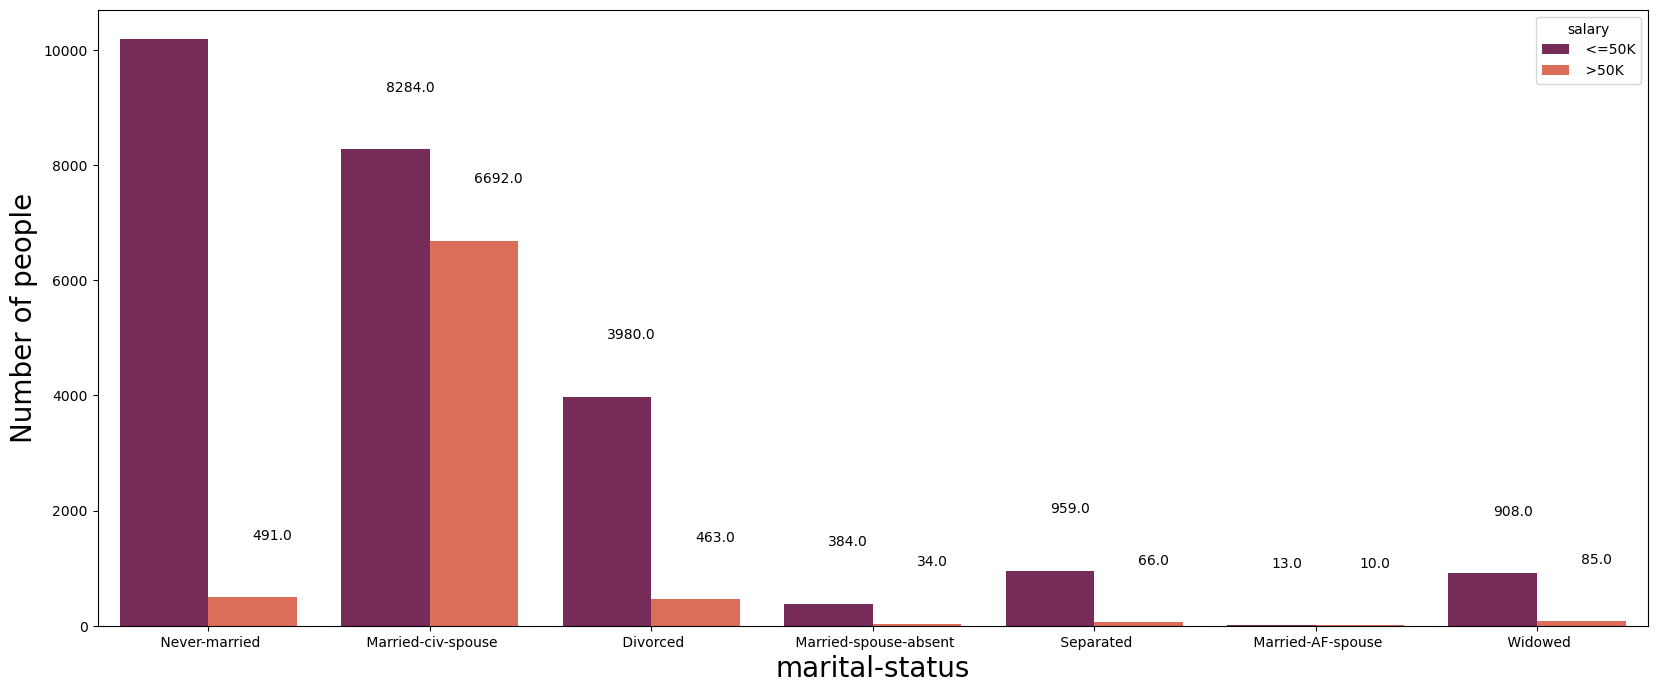

In [12]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'marital-status', hue="salary", palette = 'rocket')

plt.xlabel("marital-status", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### From the above plot, 
### a) more number of Never-married people is getting salary is <= 50k.
### b) more number of Married-civ-spouse people is getting salary is <= 50k and >50k.

# 4. Based on Age

C:\Users\breva\AppData\Local\Temp\ipykernel_15868\2397728310.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color='purple')


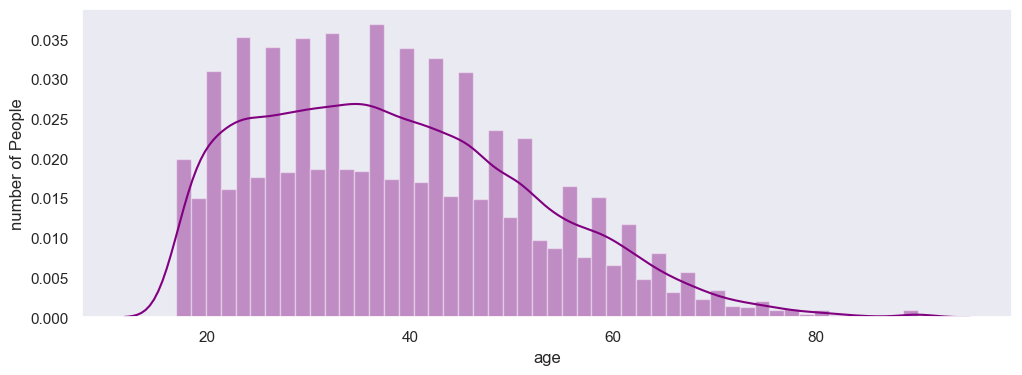

In [13]:
plt.figure(figsize=(12,4))

sns.set(style='dark')
data=df.copy()
sns.distplot(data['age'], color='purple')
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('number of People')
plt.show()

In [14]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

### From the above plot, there are more number of people of having age in the range is around  36 - 40 yrs

# 5. Based on Race

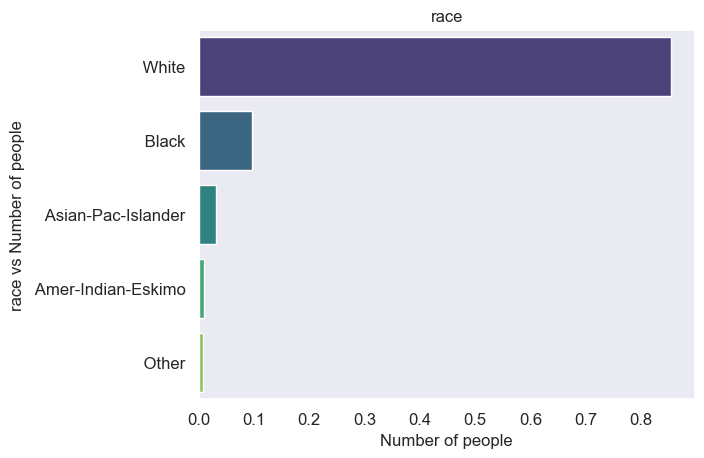

In [15]:
status = df["race"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('race')
plt.xlabel('Number of people')
plt.ylabel('race vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### From the above plot, we see that the majority of people are White

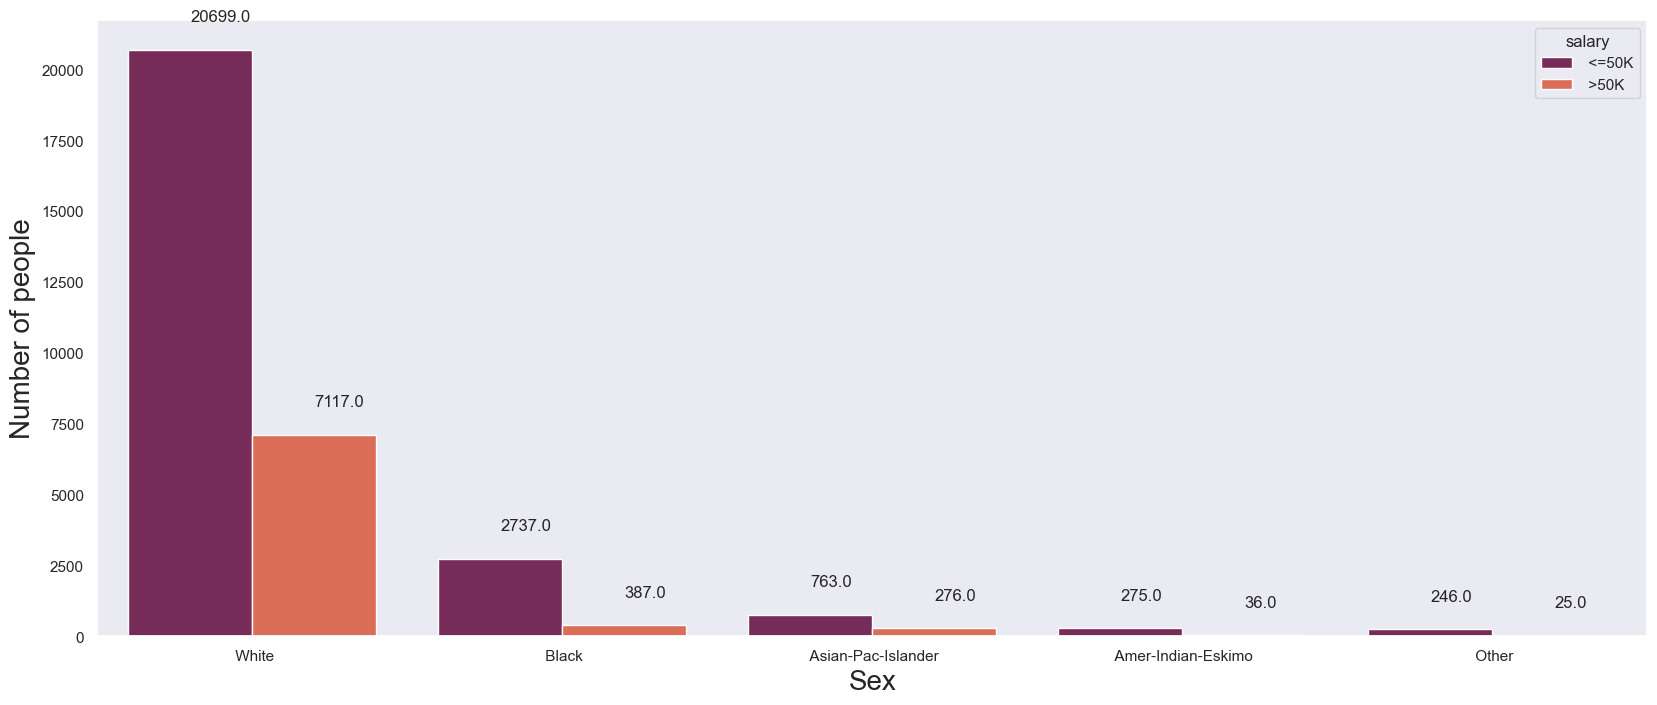

In [16]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="salary", palette = 'rocket')

plt.xlabel("Sex", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### As majority of them are White people in the dataset. So, more number of White people are getting salary is <= 50k and > 50k

# 6. Average Hours per Week

C:\Users\breva\AppData\Local\Temp\ipykernel_15868\3488579751.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week'], color='purple')


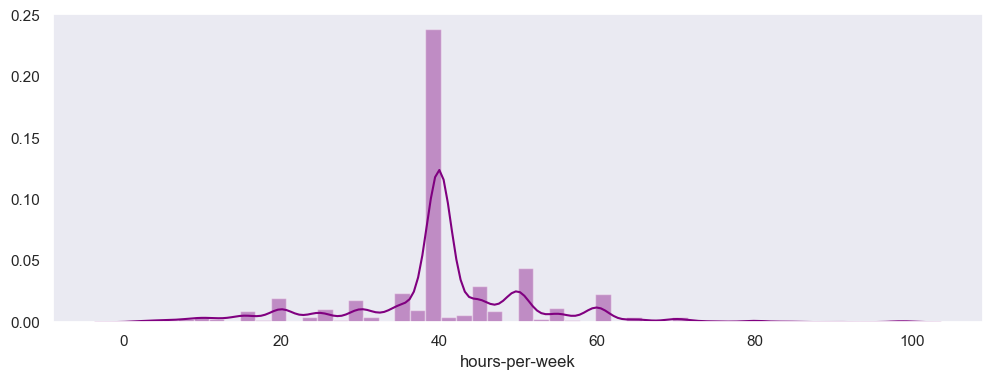

In [17]:

plt.figure(figsize=(12,4))

sns.set(style='dark')
sns.distplot(df['hours-per-week'], color='purple')
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [18]:
df["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### From the above plot average Hours per week by an individual is 40

# 7. Occupation

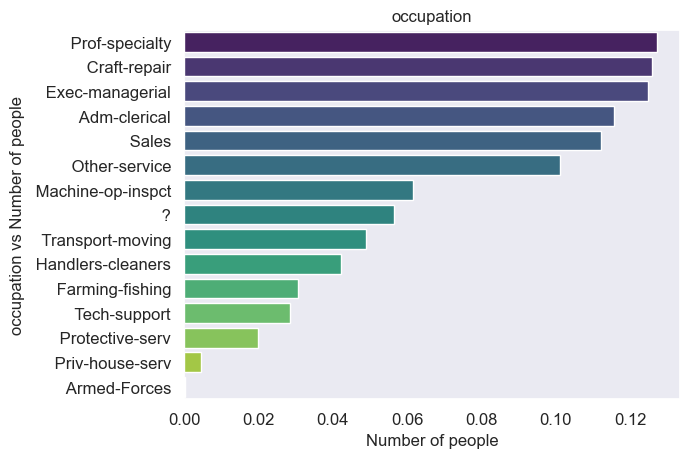

In [19]:
status = df["occupation"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('occupation')
plt.xlabel('Number of people')
plt.ylabel('occupation vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

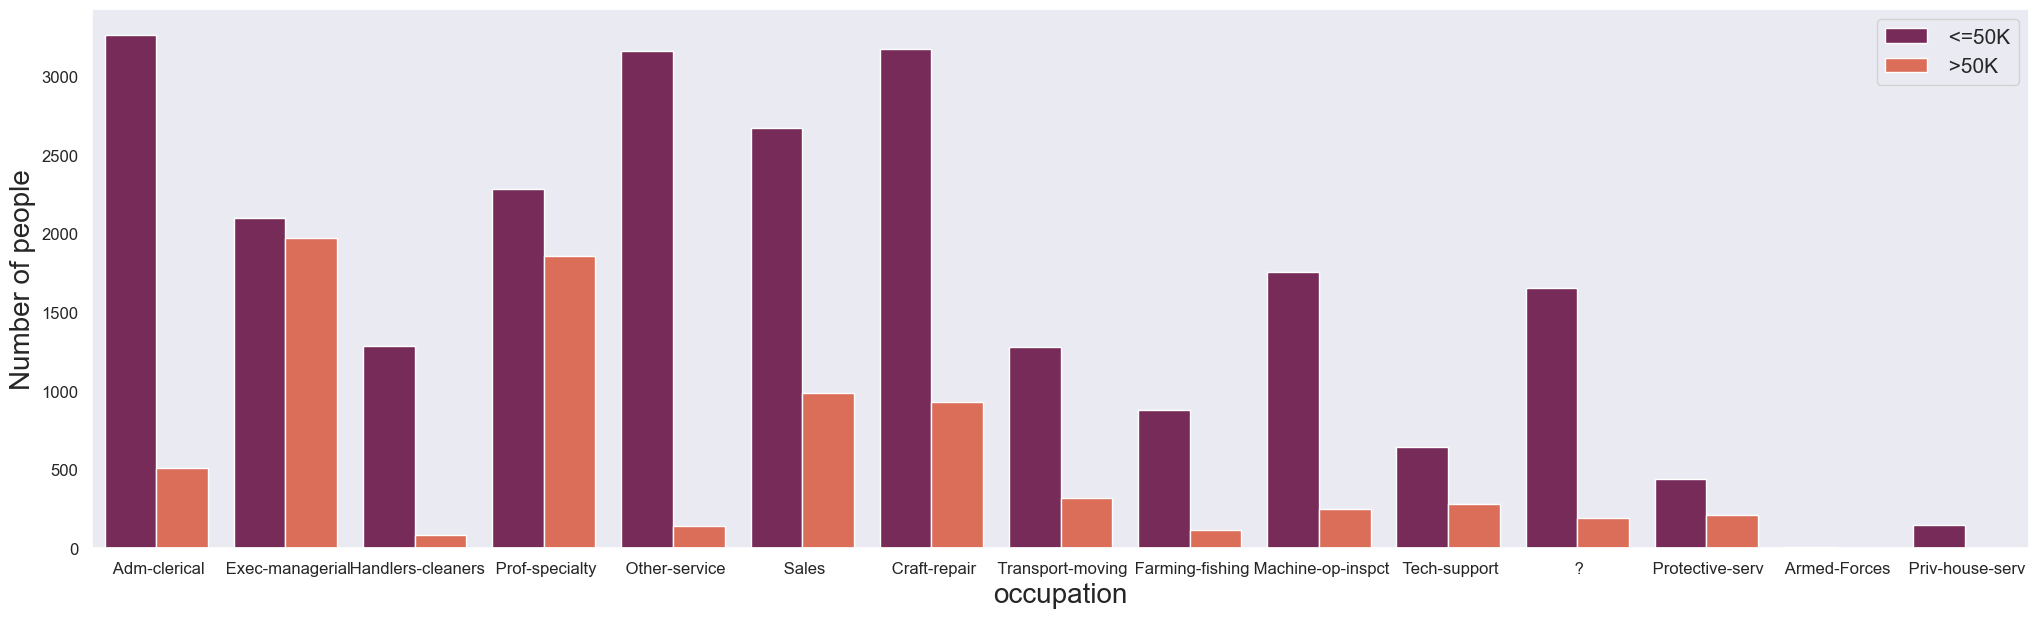

In [20]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'occupation', hue="salary", palette = 'rocket')

plt.xlabel("occupation", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot Adm-clerical,Other-service,Craft-repair is getting salary is <= 50k.

### From the above plot Exec-managerial,Prof-speciality,Craft-repair is getting salary is >50k.


# 8. Country

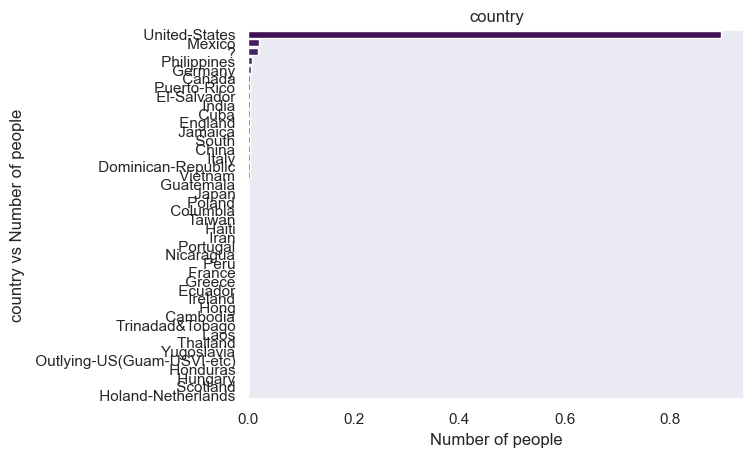

In [21]:
status = df["country"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('country')
plt.xlabel('Number of people')
plt.ylabel('country vs Number of people')
plt.show()

### From the above plot most of the data is from the United States

# 9. Workclass

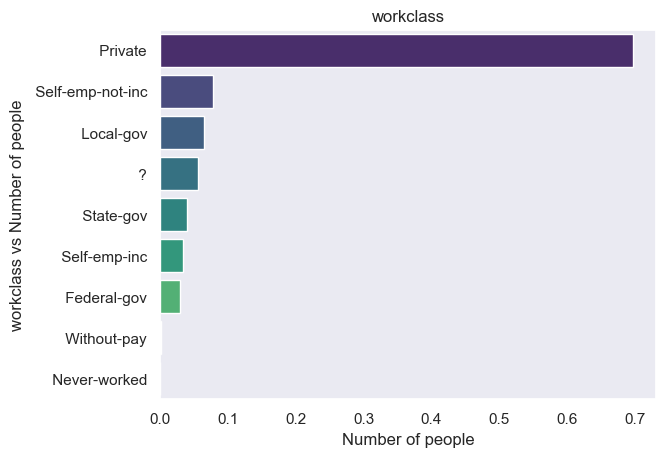

In [22]:
status = df["workclass"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('workclass')
plt.xlabel('Number of people')
plt.ylabel('workclass vs Number of people')
plt.show()

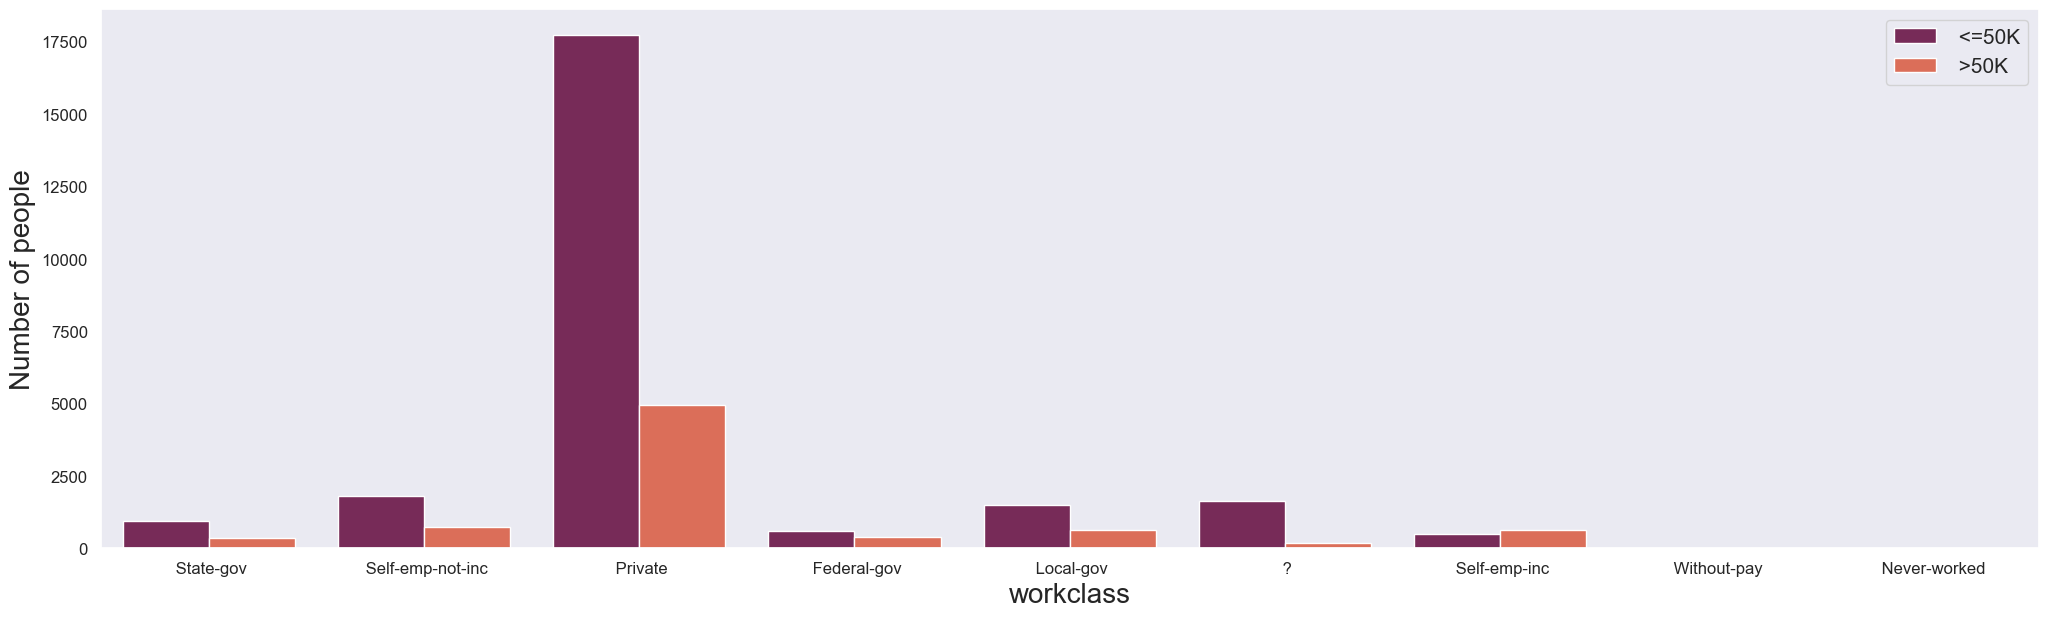

In [23]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'workclass', hue="salary", palette = 'rocket')

plt.xlabel("workclass", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot number of people in private are more those who are getting salary which is <= 50k and > 50k

## 10. Relationship

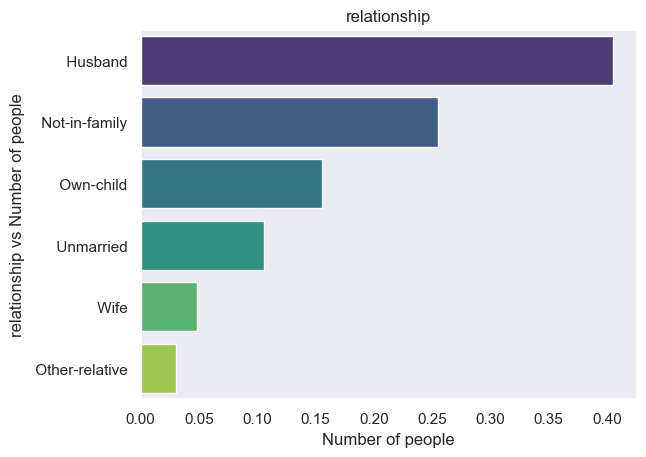

In [24]:
status = df["relationship"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('relationship')
plt.xlabel('Number of people')
plt.ylabel('relationship vs Number of people')
plt.show()

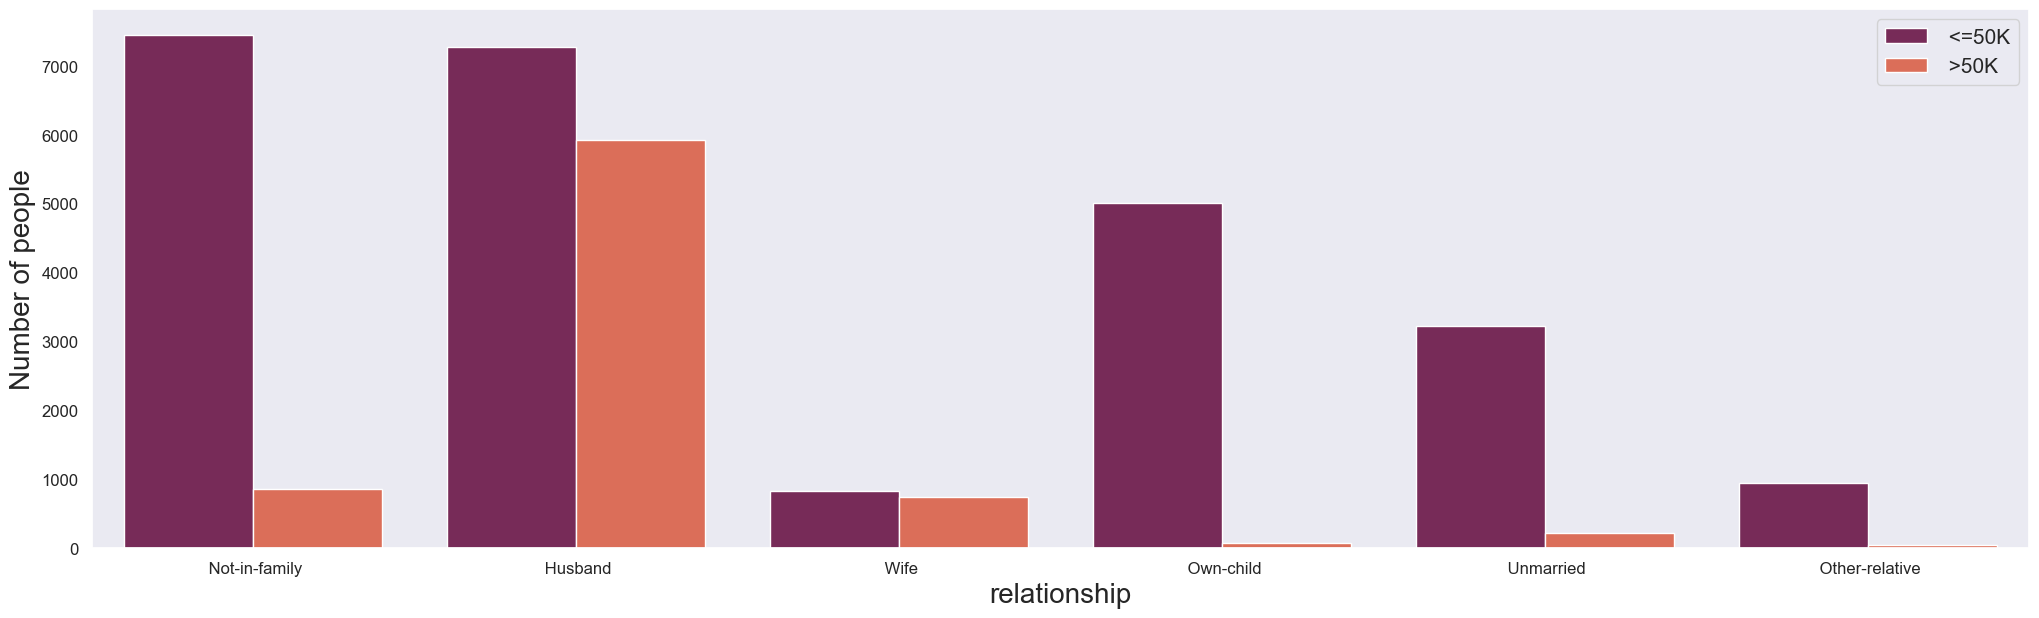

In [25]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'relationship', hue="salary", palette = 'rocket')

plt.xlabel("relationship", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot, 
### a) category of Husband is more  who are getting salary which is <= 50k and > 50k
### b) category of Not-in-family is more  who are getting salary which is <= 50k 

## 11.Education number,Race & Salary

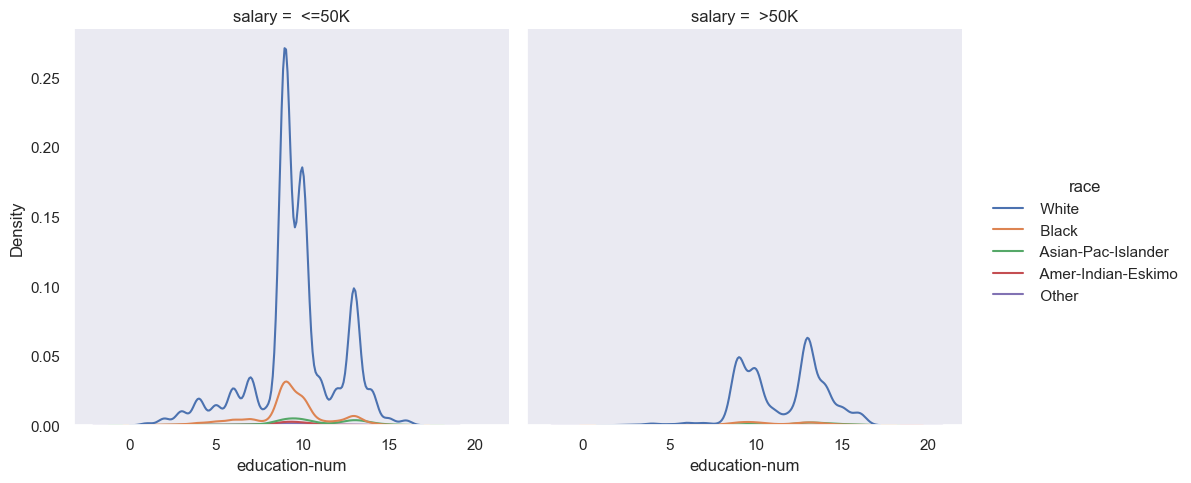

In [26]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], 
            col=df["salary"], kind="kde")


- Most of the people who are white having education for around 9 years and get a salary of <=50 k.
- Very few white people seem to get education for around 13 years and recieve a salary of >50 k.
- All other races do not get that much education and therefore have low salary.


## Hours per week,relationship & Salary

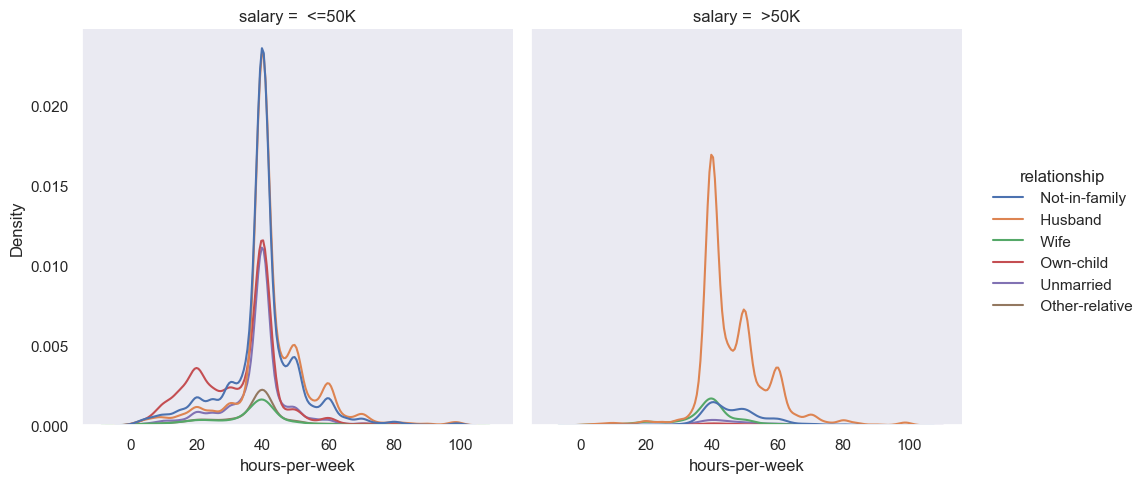

In [27]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], 
            col=df["salary"], kind="kde")

- Most of the people who are not in family work for around 40 hours per week and get a salary of <= 50 k.
- People who have a relationship of husband work for around 40 hours per week and recieve a salary of > 50 k.

## Marital-status, Hours per week & Salary

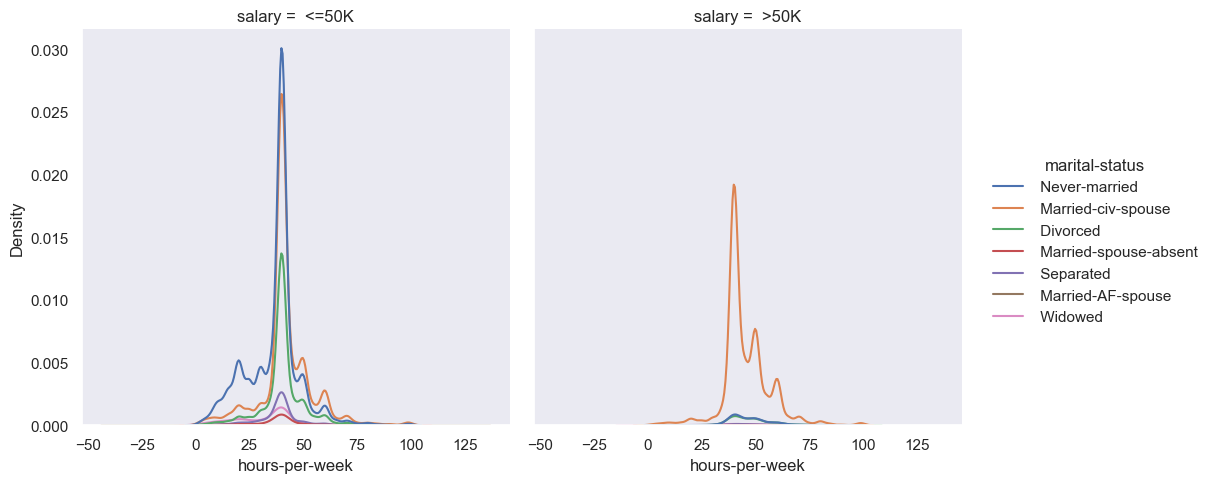

In [28]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["marital-status"], 
            col=df["salary"], kind="kde")

- Most of the people who are in Never-married, Married-civ-spouse,Divorced work for around 40 hours per week and 
  get a salary of <= 50 k.
  
- Most of the people who are Married-civ-spouse work for around 40 hours per week and recieve a salary of > 50 k.

# Plotting graphs for numerical columns.

In [29]:
df1=df[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]



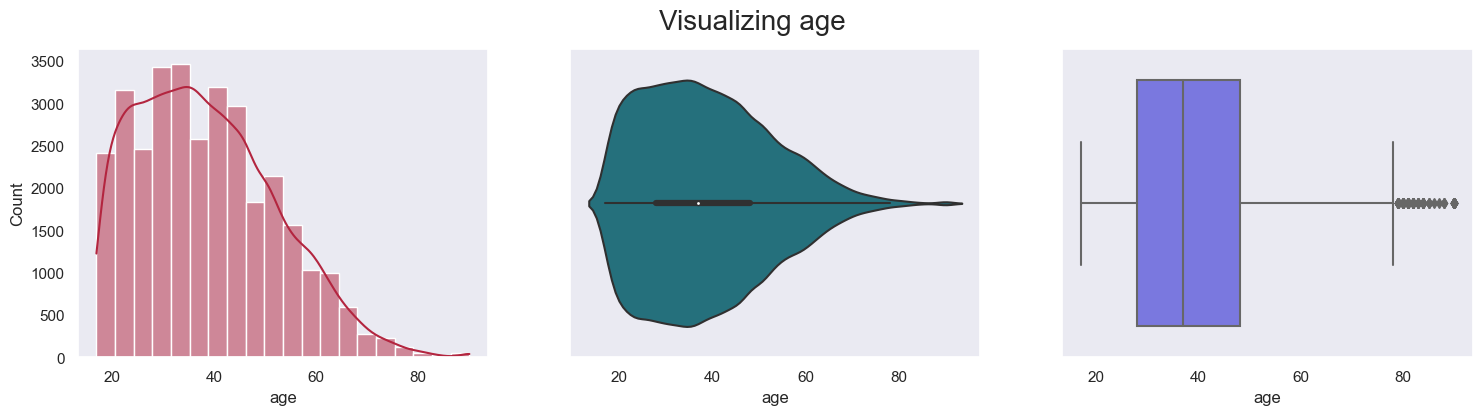

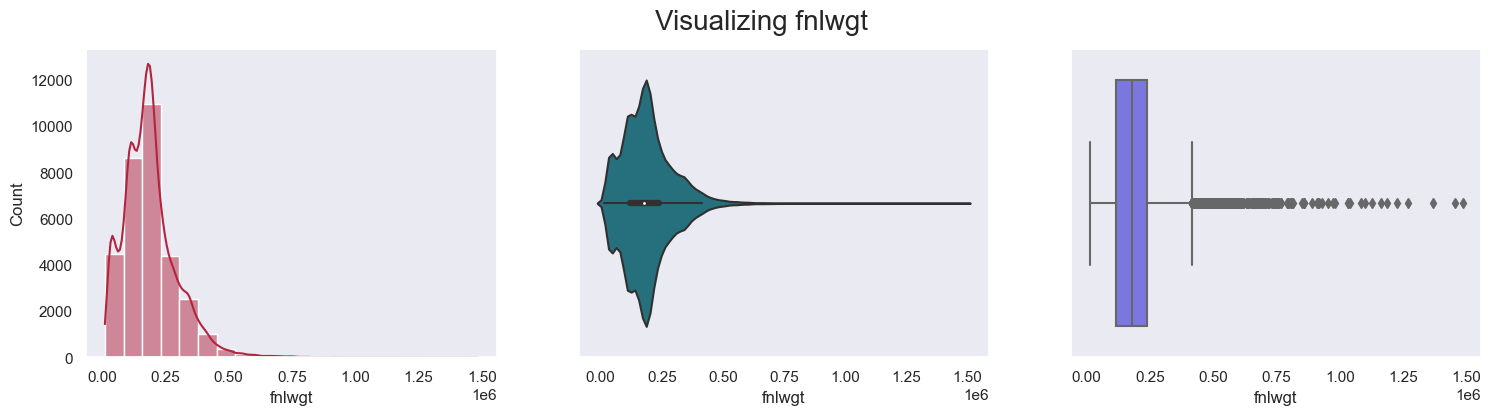

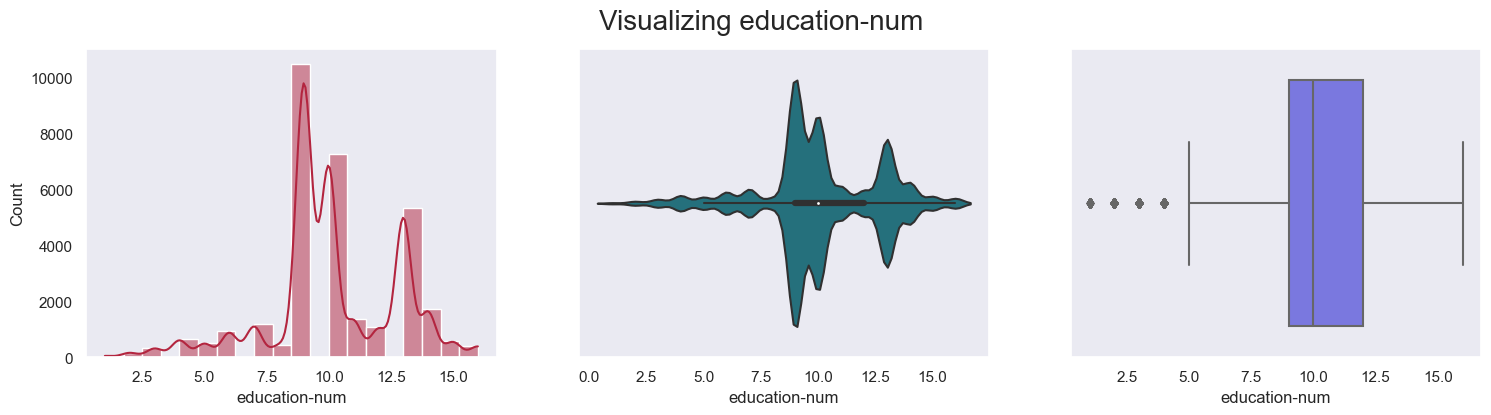

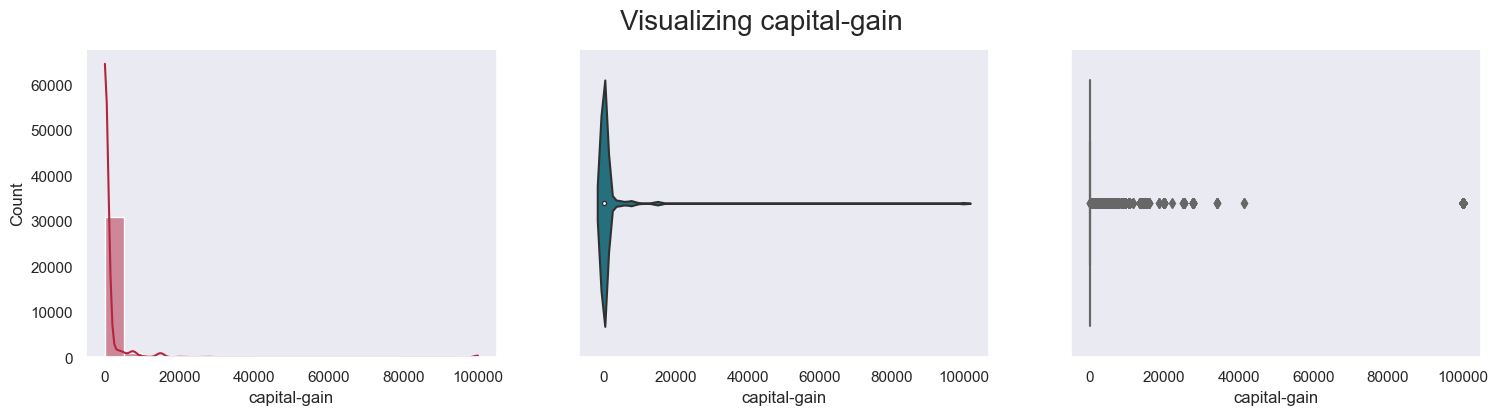

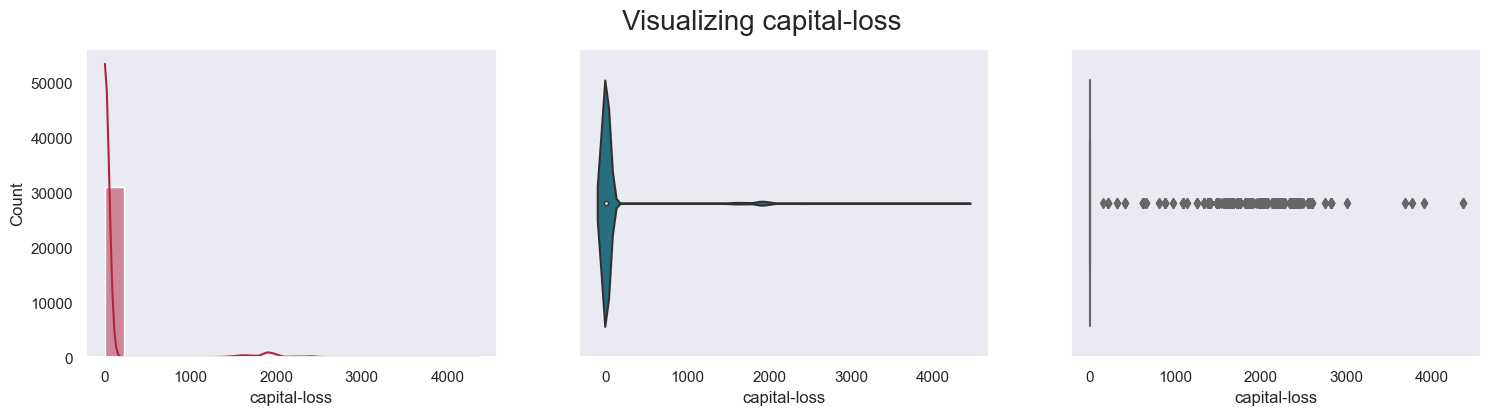

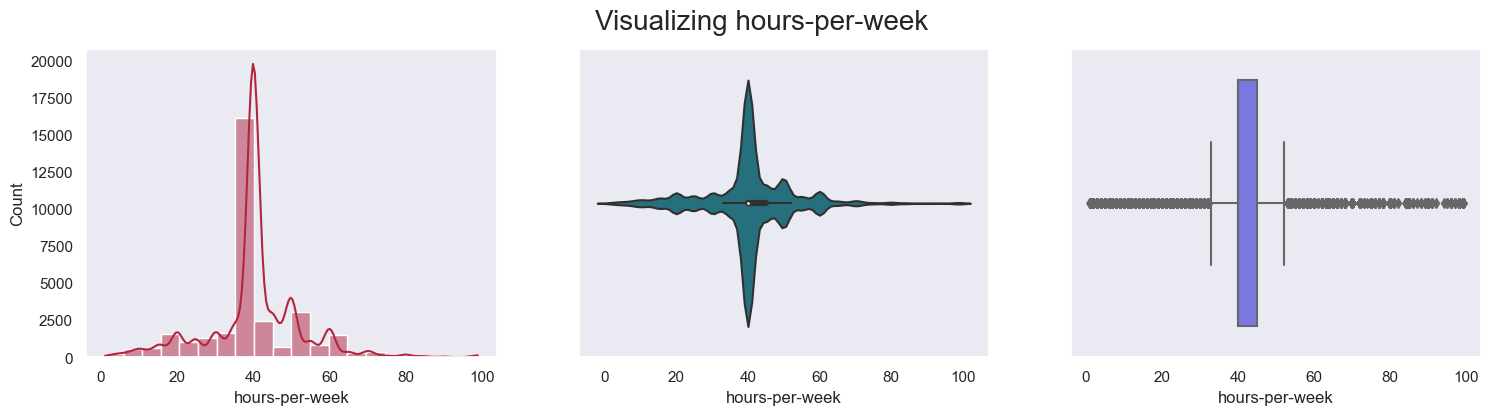

In [30]:
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

### Right-Skewed Data:

- Age
- Fnlwgt

### Outliers:
- Age
- Fnlwgt
- Education-num
- Capital-gain
- Capital-loss
- hours-per-week

<h2 style='text-align:center;font-size:30px;background-color:#DE15C5;border:20px;color:white'>Data Preprocessing <h2>

Certainly, here's a comprehensive list of encoding techniques for both nominal and ordinal data.

#### Nominal Data:

- One-Hot Encoding: Converts each category into a binary vector.
- Dummy Coding: Similar to one-hot encoding, but omits one category, reducing redundancy.
- Binary Encoding: Assigns each category an integer and then represents that integer in binary form.
- Hashing Trick (Feature Hashing): Maps categories to a fixed number of indices using hash functions.
- Entity Embeddings: Utilizes neural networks to represent categories as dense vectors.
- Target Encoding (Mean Encoding): Replaces categories with the mean of the target variable for that category.
- Count Encoding: Replaces categories with the count of occurrences in the dataset.
- CatBoost Encoding: Similar to target encoding but adds regularization to prevent overfitting.
- Leave-One-Out Encoding: Similar to target encoding but excludes the current sample's target value.
- James-Stein Encoder: A variation of target encoding with shrinkage to prevent overfitting.

#### Ordinal Data:

- Ordinal Encoding: Assigns integers based on a specified order.
- Label Encoding: Assigns unique integers to each category, often used for low cardinality.
- Integer Encoding: Similar to label encoding but assigns integers sequentially.
- Frequency Encoding: Replaces categories with their frequency in the dataset.
- Rank Encoding: Replaces categories with their rank order.
- Binary Ordinal Encoding: Assigns binary representation to ordinal categories (e.g., 001, 010, 011, etc.).
- Target Guided Ordinal Encoding: Uses target variable to guide assignment of integer labels.


Remember that the choice of encoding technique depends on the nature of your data, the cardinality of the categories, and the machine learning algorithm you intend to use. It's important to experiment with different techniques and evaluate their impact on model performance through cross-validation and other evaluation metrics.

## Nominal Data Encoding:
Nominal data represents categories without any intrinsic order. Here are encoding techniques for nominal data:

#### One-Hot Encoding:

Suitable for: low cardinality
Converts each category into a binary column. It's common to drop one column to avoid multicollinearity.

#### Label Encoding:

Suitable for: Low cardinality
Assigns each category a unique integer label. Not recommended for high cardinality due to risk of misinterpretation of ordinality.

#### Frequency Encoding / Count Encoding:

Suitable for: Both low and high cardinality
Replaces categories with their frequency of occurrence. Helpful for capturing information without increasing dimensionality.

#### Target Encoding (Mean Encoding):

Suitable for: Both low and high cardinality
Replaces categories with the mean of the target variable for each category. Helpful for incorporating target information.

#### Binary Encoding:

Suitable for: Both low and high cardinality
Converts categories into binary code (e.g., 0001, 0010, 0100). More compact than one-hot encoding for high cardinality.

#### Hashing Encoding:

Suitable for: Both low and high cardinality
Converts categories into a fixed number of hash buckets, reducing dimensionality. Collisions can occur.

## Ordinal Data Encoding:
Ordinal data has a meaningful order among its categories. Here are encoding techniques for ordinal data:

#### Label Encoding:

Suitable for: Low cardinality
Assigns integer labels based on the order of categories. Be cautious with high cardinality to avoid assuming ordinal relationships.

#### Ordinal Encoding:

Suitable for: Both low and high cardinality
Assigns custom numerical values to each category based on their ordinal relationship.


#### Binary Encoding with Order:

Suitable for: Both low and high cardinality
Combines binary encoding with the inherent order of ordinal data to create compact representations.

Remember that the choice of encoding technique depends on factors like the nature of your data, domain knowledge, the specific machine learning algorithm you're using, and the problem you're trying to solve. Experimentation and validation are essential to determine the most suitable technique for your specific scenario.








### Visual Analysis:
Analyze the histograms to determine the distribution of unique values. Look for patterns that indicate whether a feature has low or high cardinality:

- Low Cardinality: In a histogram for a low cardinality feature, you might see a few bars (bins) with higher frequencies, indicating a small number of dominant categories.

- High Cardinality: A high cardinality feature might have a histogram with many bars, each representing a unique value. The bars might be evenly spread out, indicating a wide range of values.

In [31]:
df["workclass"].nunique()

9

In [32]:
unique_values = df["workclass"].nunique()


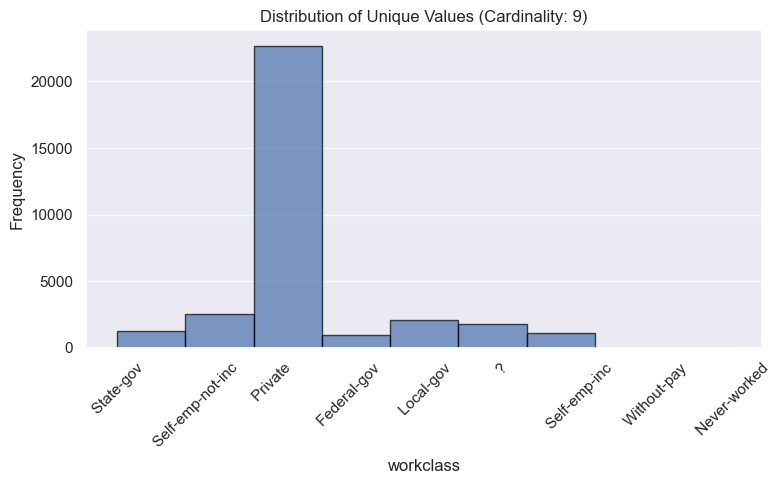

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df['workclass'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('workclass')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### workclass has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Ordinal data  so "Ordinal Encoding" is used.


In [34]:
df["education"].nunique()


16

In [35]:
unique_values = df["education"].nunique()


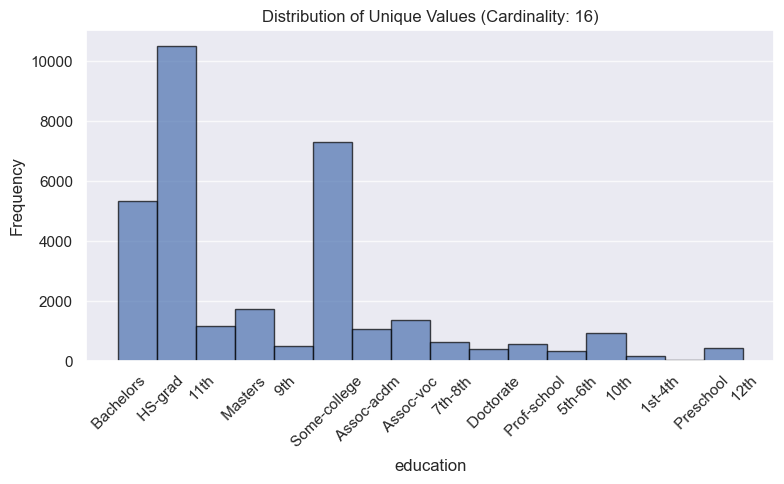

In [36]:

plt.figure(figsize=(8, 5))
plt.hist(df['education'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### education has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Ordinal data  so "Ordinal Encoding" is used.


In [37]:
df["marital-status"].nunique()


7

In [38]:
unique_values = df["marital-status"].nunique()


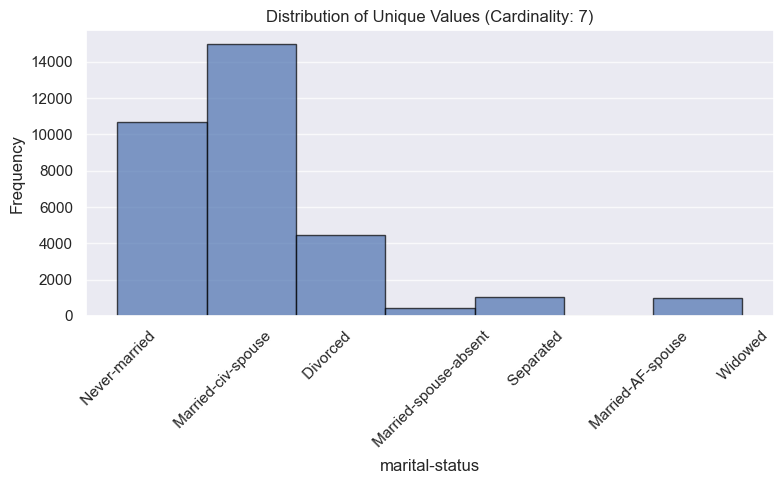

In [39]:

plt.figure(figsize=(8, 5))
plt.hist(df['marital-status'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('marital-status')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### marital-status has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Nominal data  so "Label Encoding" is used.


In [40]:
df["occupation"].nunique()


15

In [41]:
unique_values = df["occupation"].nunique()


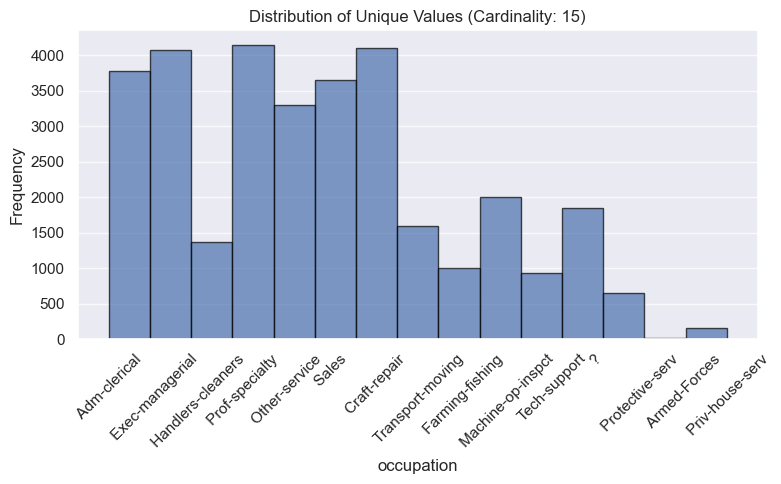

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(df['occupation'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('occupation')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### occupation has a histogram with many bars, each representing a unique value. So,it is the High cardinality feature and it is the Nominal data  so "Frequency Encoding" is used.


In [43]:
df["relationship"].nunique()


6

In [44]:
unique_values = df["relationship"].nunique()


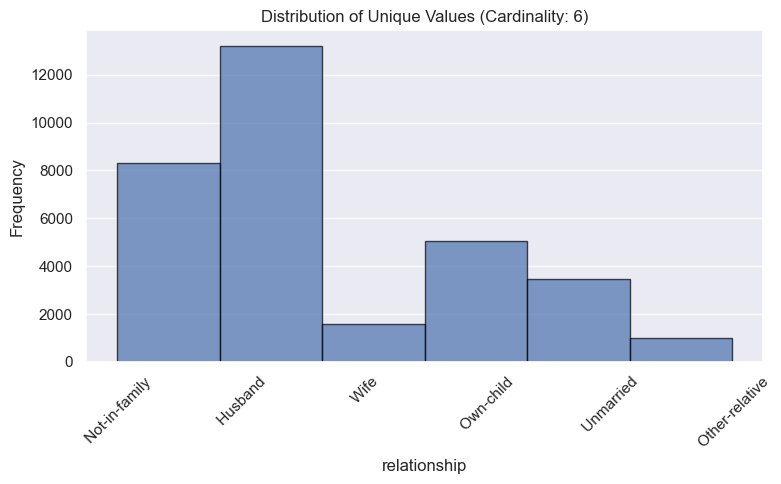

In [45]:

plt.figure(figsize=(8, 5))
plt.hist(df['relationship'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('relationship')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


### relationship has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Nominal data  so "One hot encoding" is used.


In [46]:
df["race"].nunique()


5

In [47]:
unique_values = df["race"].nunique()


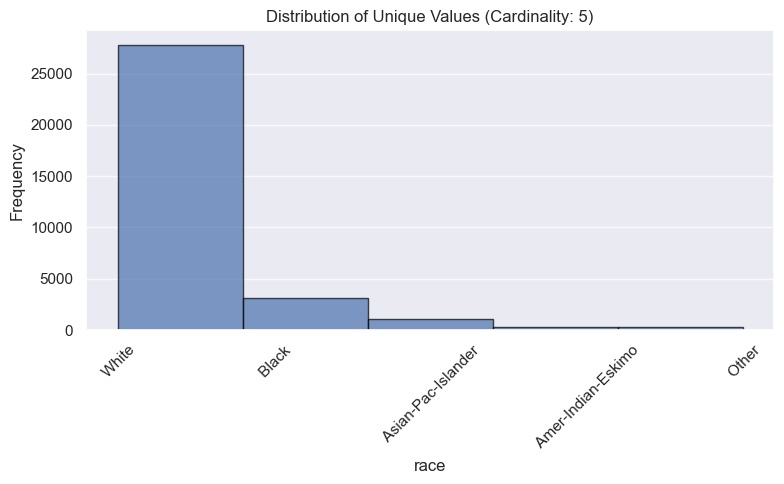

In [48]:

plt.figure(figsize=(8, 5))
plt.hist(df['race'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### race has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Nominal data  so "One hot encoding" is used.


In [49]:
df["sex"].nunique()


2

In [50]:
unique_values = df["sex"].nunique()


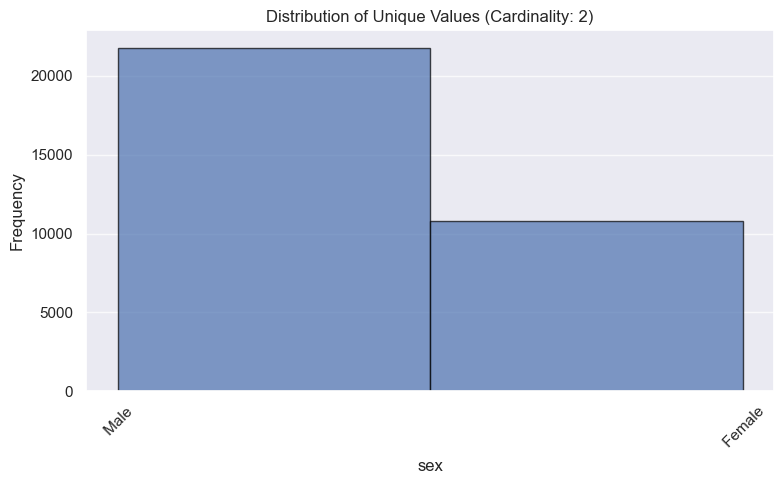

In [51]:
plt.figure(figsize=(8, 5))
plt.hist(df['sex'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### sex has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Nominal data  so "One hot encoding" is used.


In [52]:
df["country"].nunique()


42

In [53]:
unique_values = df["country"].nunique()


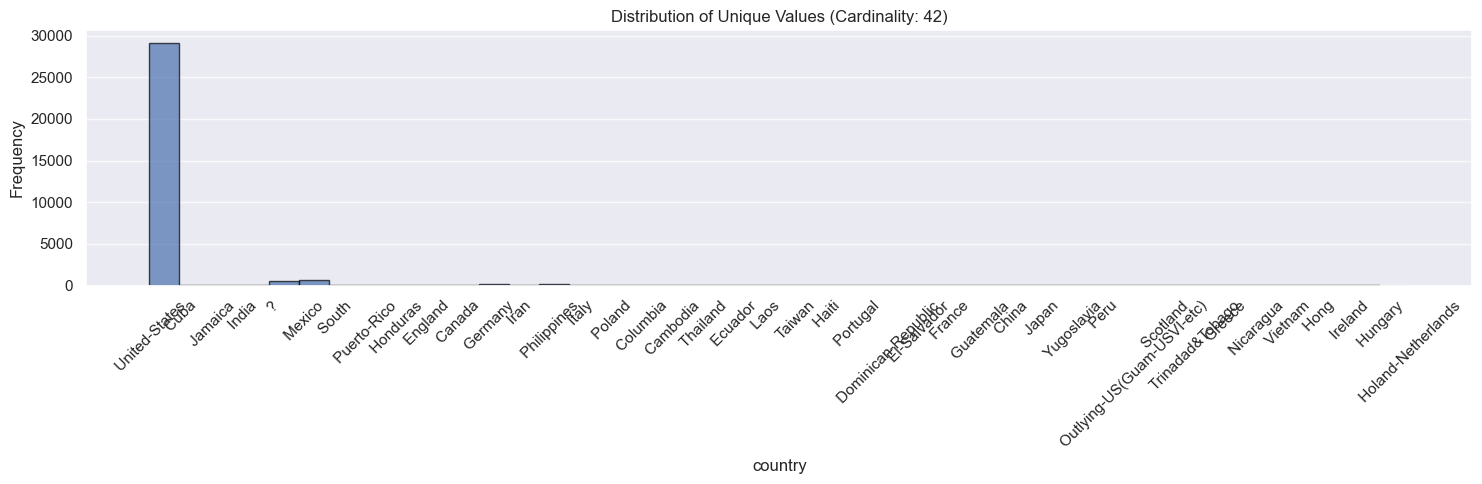

In [54]:

plt.figure(figsize=(15, 5))
plt.hist(df['country'], bins=unique_values, edgecolor='black', alpha=0.7)
plt.xlabel('country')
plt.ylabel('Frequency')
plt.title(f'Distribution of Unique Values (Cardinality: {unique_values})')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()



### country has a few bars (bins) with higher frequencies, indicating a small number of dominant categories. So,it is the low cardinality feature and it is the Nominal data  so "One hot encoding" is used.

## Understand the unique categories in the dataset


In [55]:

for i in df.columns:
    print(i,":\n",df[i].unique())



age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

In [56]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [57]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder


In [161]:
workclass_categories = [' Never-worked', ' Without-pay',' Self-emp-inc',' Self-emp-not-inc',' Local-gov',' State-gov',' Federal-gov',' Private']
            

education_categories = [' Preschool',' 1st-4th',' 5th-6th', ' 7th-8th', ' 9th',' 10th',' 11th',' 12th',' Some-college',' HS-grad',
                        ' Assoc-voc',' Assoc-acdm', ' Bachelors',' Prof-school',' Masters',' Doctorate']



In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,TargetEncoder 



# Categorigal Pipeline
categorical_cols_for_OrdinalEncoding = ['workclass', 'education']


categorical_cols_for_OnehotEncoding = ['marital-status', 'relationship', 'race', 'sex', 'occupation', 'country']




Numerical_cols  = ['age','education-num','capital-gain', 'capital-loss', 'hours-per-week']


Numerical_pipeline_for_missingvalues = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                 ])
            
categorical_pipeline_for_OrdinalEncoding = Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="most_frequent",missing_values= ' ?')),
                ('OrdinalEncoder', OrdinalEncoder(categories=[workclass_categories,education_categories],dtype=int)),
                ('scaler',StandardScaler())
                ])

categorical_pipeline_for_OnehotEncoding = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent',missing_values= ' ?')),
                ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
                ('scaler',StandardScaler())
                ]
                )


preprocessor=ColumnTransformer(transformers= 
        [('Numerical_pipeline_for_missingvalues', Numerical_pipeline_for_missingvalues,Numerical_cols),
         ('cat_pipeline_for_OrdinalEncoding', categorical_pipeline_for_OrdinalEncoding,categorical_cols_for_OrdinalEncoding),
         ('categorical_pipeline_for_OnehotEncoding', categorical_pipeline_for_OnehotEncoding,categorical_cols_for_OnehotEncoding),                      
         ],
                                                          remainder='passthrough',sparse_threshold=0)         

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
preprocessor.fit_transform(df)

array([[0.030670557354391753, 1.1347387637961643, 0.14845289521747937,
        ..., -0.022172662853843467, 77516, ' <=50K'],
       [0.8371089803598137, 1.1347387637961643, -0.14592048355885345,
        ..., -0.022172662853843467, 83311, ' <=50K'],
       [-0.042642026555192065, -0.4200596240159423, -0.14592048355885345,
        ..., -0.022172662853843467, 215646, ' <=50K'],
       ...,
       [1.4236096516364842, -0.4200596240159423, -0.14592048355885345,
        ..., -0.022172662853843467, 151910, ' <=50K'],
       [-1.215643369108533, -0.4200596240159423, -0.14592048355885345,
        ..., -0.022172662853843467, 201490, ' <=50K'],
       [0.9837341481789813, -0.4200596240159423, 1.888424338306659, ...,
        -0.022172662853843467, 287927, ' >50K']], dtype=object)

In [85]:
df_final = pd.DataFrame(preprocessor.fit_transform(df))


In [86]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.802385,1.06838,-0.397508,-0.026587,-0.922841,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,77516,<=50K
1,0.837109,1.134739,-0.14592,-0.21666,-2.222153,-2.128264,1.06838,-0.397508,-0.026587,1.083611,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,83311,<=50K
2,-0.042642,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,2.515672,-0.026587,-0.922841,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,215646,<=50K
3,1.057047,-1.197459,-0.14592,-0.21666,-0.035429,0.523494,-1.232914,-0.397508,-0.026587,1.083611,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,234721,<=50K
4,-0.775768,1.134739,-0.14592,-0.21666,-0.035429,0.523494,1.06838,-0.397508,-0.026587,1.083611,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173,338409,<=50K


In [94]:
Final_data = df_final.drop(columns= 82,axis=1)

In [95]:
Final_data

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,83
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.802385,1.06838,-0.397508,-0.026587,-0.922841,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
1,0.837109,1.134739,-0.14592,-0.21666,-2.222153,-2.128264,1.06838,-0.397508,-0.026587,1.083611,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
2,-0.042642,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,2.515672,-0.026587,-0.922841,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
3,1.057047,-1.197459,-0.14592,-0.21666,-0.035429,0.523494,-1.232914,-0.397508,-0.026587,1.083611,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
4,-0.775768,1.134739,-0.14592,-0.21666,-0.035429,0.523494,1.06838,-0.397508,-0.026587,1.083611,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.84908,0.746039,-0.14592,-0.21666,-0.197409,0.523494,0.684831,-0.397508,-0.026587,1.083611,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
32557,0.103983,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,-0.397508,-0.026587,1.083611,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,>50K
32558,1.42361,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,-0.397508,-0.026587,-0.922841,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K
32559,-1.215643,-0.42006,-0.14592,-0.21666,-1.655225,0.523494,-0.082267,-0.397508,-0.026587,-0.922841,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173,<=50K


In [106]:
X = Final_data.drop(columns=83,axis=1)
final_y = Final_data[83]

In [107]:
X

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.802385,1.06838,-0.397508,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,1.134739,-0.14592,-0.21666,-2.222153,-2.128264,1.06838,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,2.515672,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,-1.197459,-0.14592,-0.21666,-0.035429,0.523494,-1.232914,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,1.134739,-0.14592,-0.21666,-0.035429,0.523494,1.06838,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.84908,0.746039,-0.14592,-0.21666,-0.197409,0.523494,0.684831,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32557,0.103983,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32558,1.42361,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,-0.397508,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32559,-1.215643,-0.42006,-0.14592,-0.21666,-1.655225,0.523494,-0.082267,-0.397508,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173


In [108]:
final_y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: 83, Length: 32561, dtype: object

In [109]:
salary_map = {' <=50K':0,' >50K':1}

y = final_y.map(salary_map)


In [110]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: 83, Length: 32561, dtype: int64

In [111]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: 83, dtype: float64

In [112]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [113]:
!pip install imbalanced-learn


In [82]:
from imblearn.over_sampling import RandomOverSampler,SMOTE


def perform_random_oversampling(path):
        
    train_df = pd.read_csv(path)

    column_name_mapping = {'marital-status': 'marital_status', 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss',
                         'hours-per-week':'hours_per_week','education-num':'education_num'}

    train_df = train_df.rename(columns=column_name_mapping)


    X = train_df.drop(columns=['salary','fnlwgt','race','country'],axis=1)
    y = pd.DataFrame(train_df['salary'])


    ros = RandomOverSampler()

    X_resampled, y_resampled = ros.fit_resample(X, y)

    final_dataframe = pd.concat([X_resampled, y_resampled], axis=1)

    return final_dataframe

In [85]:
d = perform_random_oversampling("adult.csv")

In [86]:
d

,age,workclass,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
49435,37,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,45,>50K
49436,64,?,Bachelors,13,Married-civ-spouse,?,Husband,Male,0,0,50,>50K
49437,34,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,60,>50K
49438,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,>50K


In [87]:
d["salary"].value_counts(normalize=True)

 <=50K    0.5
 >50K     0.5
Name: salary, dtype: float64

In [114]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [115]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [116]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: 83, dtype: float64

In [118]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.802385,1.06838,-0.397508,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,1.134739,-0.14592,-0.21666,-2.222153,-2.128264,1.06838,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,-0.42006,-0.14592,-0.21666,-0.035429,0.523494,-0.082267,2.515672,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,-1.197459,-0.14592,-0.21666,-0.035429,0.523494,-1.232914,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,1.134739,-0.14592,-0.21666,-0.035429,0.523494,1.06838,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,0.323921,-0.03136,-0.14592,-0.21666,0.774468,0.523494,-0.465816,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
49436,-0.409205,1.134739,-0.14592,-0.21666,0.369519,0.523494,1.06838,-0.397508,-0.026587,-0.922841,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
49437,1.790173,-0.03136,0.842275,-0.21666,0.612489,0.523494,-0.465816,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
49438,0.617171,1.134739,-0.14592,-0.21666,-0.035429,0.523494,1.06838,-0.397508,-0.026587,1.083611,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173


In [126]:
x = X_new.values

In [131]:
x

array([[0.030670557354391753, 1.1347387637961643, 0.14845289521747937,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467],
       [0.8371089803598137, 1.1347387637961643, -0.14592048355885345,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467],
       [-0.042642026555192065, -0.4200596240159423, -0.14592048355885345,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467],
       ...,
       [1.7901725711844034, -0.03136002706291564, 0.8422749710454138,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467],
       [0.6171712286310623, 1.1347387637961643, -0.14592048355885345,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467],
       [0.47054606081189465, 1.1347387637961643, -0.14592048355885345,
        ..., 0.30720845953467013, -0.04540835962167961,
        -0.022172662853843467]], dtype=object)

In [127]:
Y = y_new.values

In [130]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

<h2 style='text-align:center;font-size:30px;background-color:#FF8A33 ;border:20px;color:white'>Model Training <h2>

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=30)

In [134]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 82)
X_test shape: (14832, 82)
y_train shape: (34608,)
y_test shape: (14832,)


In [135]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()


In [136]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Bayes
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

## Evaluation of Models


In [137]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score



In [138]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 82.497
F1 Score:  82.878
roc_auc_score:  82.524
MSE:  17.503


In [139]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 68.507
F1 Score:  75.015
roc_auc_score:  68.745
MSE:  31.493


In [140]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 91.148
F1 Score:  91.459
roc_auc_score:  91.187
MSE:  8.852


In [141]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 89.637
F1 Score:  90.025
roc_auc_score:  89.679
MSE:  10.363


In [142]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 83.077
F1 Score:  83.748
roc_auc_score:  83.12
MSE:  16.923


In [143]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 86.698
F1 Score:  87.051
roc_auc_score:  86.729
MSE:  13.302


# Hyper - Tuning Parameters

### Decision Tree

In [144]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [145]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137974,0.017207,0.014616,0.000370,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785033,0.778966,0.778677,0.765352,0.780812,0.777768,0.00661,43
1,0.145493,0.016184,0.015991,0.001673,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785033,0.778966,0.778677,0.765352,0.780812,0.777768,0.00661,43
2,0.124995,0.010315,0.014830,0.000931,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785033,0.778966,0.778677,0.765352,0.780812,0.777768,0.00661,43
3,0.135411,0.011478,0.016003,0.001544,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785033,0.778966,0.778677,0.765352,0.780812,0.777768,0.00661,43
4,0.185595,0.090266,0.017584,0.005752,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785033,0.778966,0.778677,0.765352,0.780812,0.777768,0.00661,43


In [146]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [147]:
grid_search.best_score_

0.8424930159711821

In [148]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [149]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))


RandomForestClassifier:
Accuracy score: 85.403
F1 Score:  86.037
roc_auc_score:  85.45
MSE:  14.597


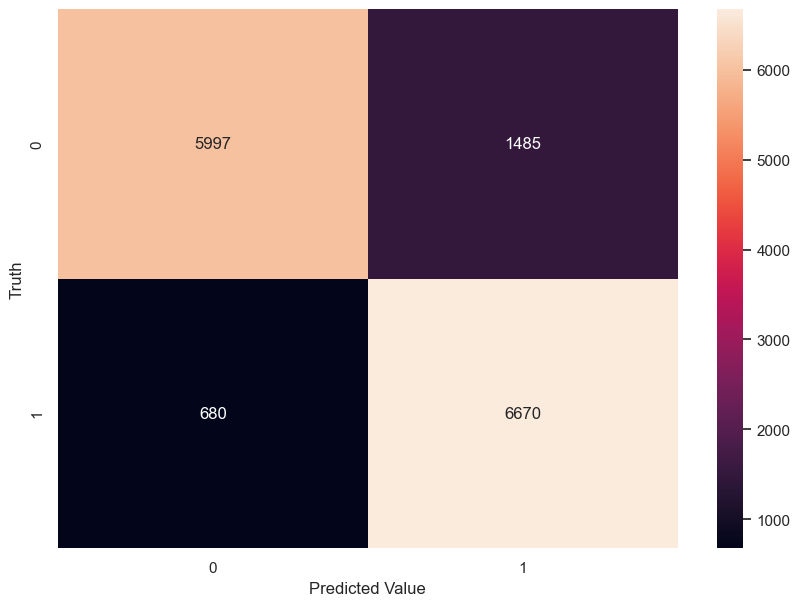

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

### Random Forest

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np


n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]


skfold=StratifiedKFold(n_splits=5)


parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=skfold,random_state=30)


In [160]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [153]:
rf_cv.best_params_

{'n_estimators': 102, 'max_depth': 40}

In [154]:
rf_cv.best_score_

nan

In [155]:
rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [156]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("roc_auc_score: ", round(roc_auc_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 91.107
F1 Score:  91.412
roc_auc_score:  91.146
MSE:  8.893


In [157]:
score_rf = pd.DataFrame(rf_cv.cv_results_)
score_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.960147,0.046940,0.002846,0.004175,102,40,"{'n_estimators': 102, 'max_depth': 40}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1.676278,0.124297,0.000606,0.000810,40,134,"{'n_estimators': 40, 'max_depth': 134}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3.059016,0.043681,0.000392,0.000481,79,126,"{'n_estimators': 79, 'max_depth': 126}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3.299560,0.008411,0.000393,0.000482,87,134,"{'n_estimators': 87, 'max_depth': 134}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2.784772,0.078706,0.000395,0.000484,71,95,"{'n_estimators': 71, 'max_depth': 95}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


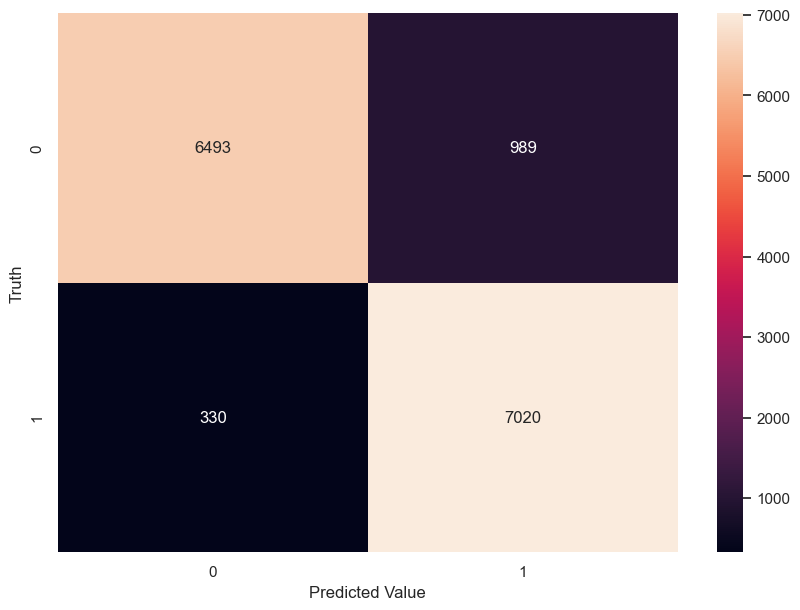

In [158]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

###  Here we used multiple models like logistic regression, Naive Bayes, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and XGBoost classifier.


###  Among the all classification algorithms Random forest classifier performed best and got high scores, which is given below

#### Accuracy score: 91.107
#### F1 Score:  91.412
#### roc_auc_score:  91.146
#### MSE:  8.893

